In [45]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [47]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

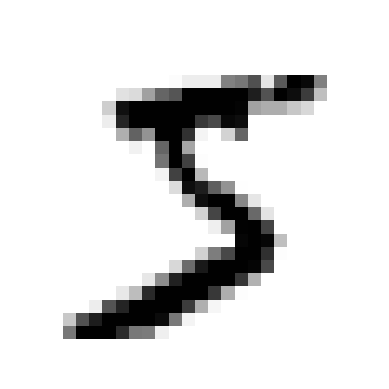

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.iloc[0]
some_digit_image = some_digit.to_numpy().reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [49]:
y[0]

'5'

In [50]:
import numpy as np
y = y.astype(np.uint8)


In [51]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [52]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)


In [53]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

c:\Users\Allan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [55]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
     def fit(self, X, y=None):
         return self
     def predict(self, X):
         return np.zeros((len(X), 1), dtype=bool)


In [56]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [57]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [59]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [60]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)

0.8370879772350012

In [61]:
recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)

0.6511713705958311

In [62]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7325171197343847

In [63]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

c:\Users\Allan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [64]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [65]:
threshold=8000
y_some_digit_pred=(y_scores > threshold)
y_some_digit_pred

array([False])

In [66]:
y_scores= cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [67]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

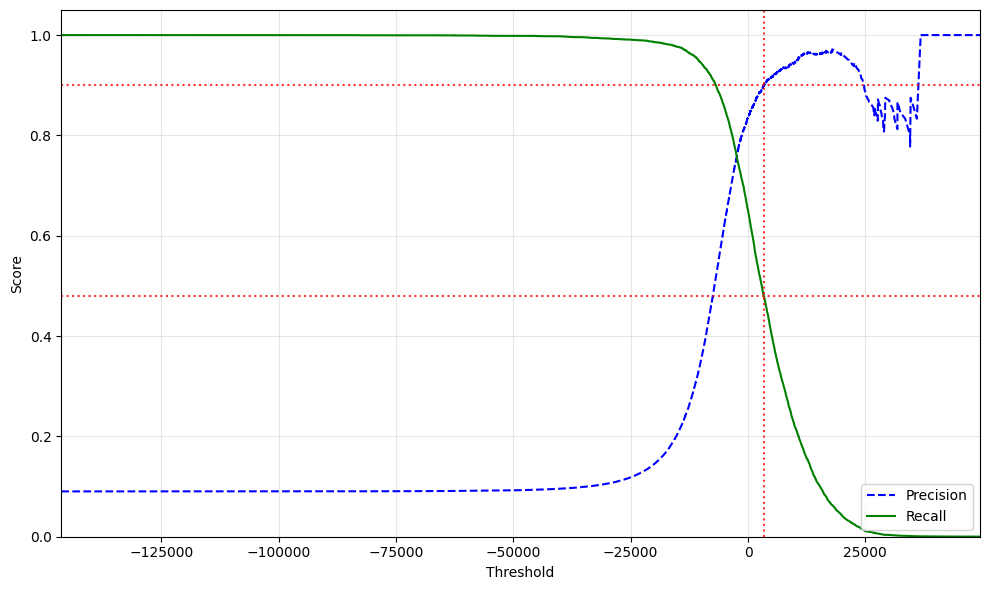

In [68]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 6))
    
    # Plot precision and recall curves
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
    # Find the point where precision is approximately 0.9
    target_precision = 0.9
    idx_precision = np.abs(precisions[:-1] - target_precision).argmin()
    threshold_at_precision = thresholds[idx_precision]
    
    # Add vertical line at the selected threshold
    plt.axvline(x=threshold_at_precision, color='r', linestyle=':', alpha=0.8)
    
    # Add horizontal lines at specific values (0.9 and 0.45 based on the image)
    plt.axhline(y=target_precision, color='r', linestyle=':', alpha=0.8)
    plt.axhline(y=recalls[idx_precision], color='r', linestyle=':', alpha=0.8)
    
    # Set axis labels, title, legend and grid
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.grid(True, alpha=0.3)
    plt.legend(loc="lower right")
    
    # Set y-axis limits to match the image
    plt.ylim([0, 1.05])
    
    # Set x-axis limits (the image shows a wide range from -40000 to 40000)
    # You may need to adjust these limits based on your actual thresholds
    x_min = min(thresholds) if min(thresholds) < -40000 else -40000
    x_max = max(thresholds) if max(thresholds) > 40000 else 40000
    plt.xlim([x_min, x_max])
    
    # Use a tight layout
    plt.tight_layout()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [69]:
threshold_90_precision = thresholds[np.argmax(precisions >=0.90)]

In [70]:
y_train_pred_90 =(y_scores >=threshold_90_precision)

In [71]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [72]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [73]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

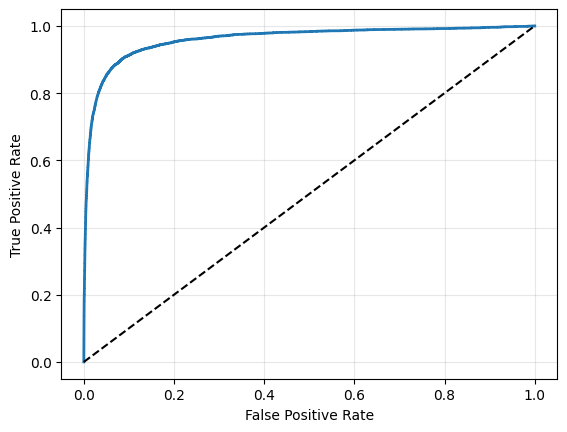

In [74]:
 def plot_roc_curve(fpr, tpr, label=None):
     plt.plot(fpr, tpr, linewidth=2, label=label)
     plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
     plt.xlabel("False Positive Rate")
     plt.ylabel("True Positive Rate")
     plt.grid(True, alpha=0.3)
     
    
plot_roc_curve(fpr, tpr)
plt.show()

In [75]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [76]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")


In [77]:
 y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
 fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

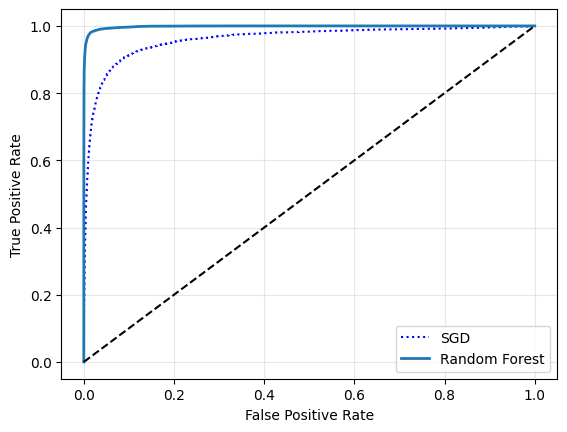

In [78]:
 plt.plot(fpr, tpr, "b:", label="SGD")
 plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
 plt.legend(loc="lower right")
 plt.show()

In [79]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

In [80]:
from sklearn.svm import SVC
svm_clf =SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

c:\Users\Allan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [81]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

c:\Users\Allan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [82]:
np.argmax(some_digit_scores)

np.int64(5)

In [83]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [84]:
svm_clf.classes_[5]

np.uint8(5)

In [85]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

c:\Users\Allan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Allan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Allan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Allan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Allan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Allan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: 

array([5], dtype=uint8)

In [86]:
len(ovr_clf.estimators_)

10

In [87]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

c:\Users\Allan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [88]:
sgd_clf.decision_function([some_digit])

c:\Users\Allan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [89]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])